# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [19]:
# your code here
import random
dice = random.choices(range(1,7), k=10)
dice = pd.DataFrame(dice)
dice.head(10)

,0
0,1
1,6
2,5
3,2
4,3
5,5
6,2
7,5
8,3
9,4


#### 2.- Plot the results sorted by value.

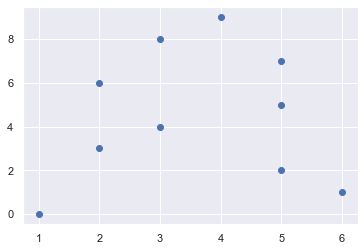

In [20]:
# your code here
dice.columns = ['output']
dice.sort_values('output')

plt.scatter(x = dice['output'], y = dice.index)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([0.1, 0.2, 0.2, 0.1, 0.3, 0.1]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

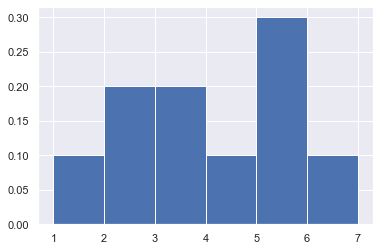

In [26]:
# your code here
plt.hist(dice['output'], bins = range(1,8), density = True)

"""
your comments here
"""

The scatterplot shows what roll number correlated to that value, which is less useful information. In this case the frequency is better since we can see how the 10 rolls are relatively evenly distributed.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [27]:
# your code here
def mean(x):
    m = sum(x) / len(x)
    return m

mean(dice['output'])

3.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [28]:
# your code here
freq = pd.DataFrame((dice['output'].value_counts()) / len(dice))
print(freq.index)
mean = sum(freq.index * freq['output'])
mean

Int64Index([5, 3, 2, 6, 4, 1], dtype='int64')


3.6

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [74]:
# your code here
def med(x):
    x = x.sort_values()
    x = x.reset_index(drop = True)
    if len(x) % 2 == 0:
        m = (x[int(len(x) / 2) - 1] + x[int(len(x) / 2)])/2
    else:
        m = x[int(len(x) / 2)]
    return m

med(dice['output'])

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [79]:
# your code here
def quarts(x):
    x = x.sort_values()
    x = x.reset_index(drop = True)
    if len(x) % 2 == 0:
        q1 = (x[int(len(x) * 0.25 - 1)] + x[int(len(x) * 0.25)])/2
        q2 = (x[int(len(x) * 0.5 - 1)] + x[int(len(x) * 0.5)])/2
        q3 = (x[int(len(x) * 0.75 - 1)] + x[int(len(x) * 0.75)])/2
        q4 = x.max()
    else:
        q1 = x[int(len(x) * 0.25)]
        q2 = x[int(len(x) * 0.5)]
        q3 = x[int(len(x) * 0.75)]
        q4 = x.max()
    return q1, q2, q3, q4

quarts(dice['output'])

(2.0, 3.5, 5.0, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

    Unnamed: 0  roll  value
0            0     0      1
47          47    47      1
56          56    56      1
9            9     9      1
73          73    73      1


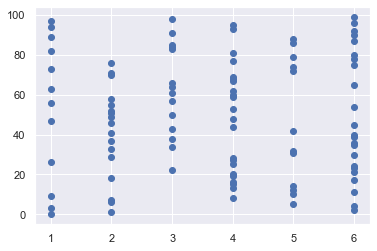

In [80]:
# your code here
dice = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice.head()
print(dice.sort_values('value').head())
plt.scatter(x = dice['value'], y = dice['roll'])

"""
your comments here
"""

6 has the most occurences, but looks relatively equal.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [81]:
# your code here
def mean(x):
    m = sum(x) / len(x)
    return m

mean(dice['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [96]:
# your code here
freq = pd.DataFrame((dice['value'].value_counts()) / len(dice))
freq

,value
6,0.23
4,0.22
2,0.17
3,0.14
5,0.12
1,0.12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([0.12, 0.17, 0.14, 0.22, 0.12, 0.23]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

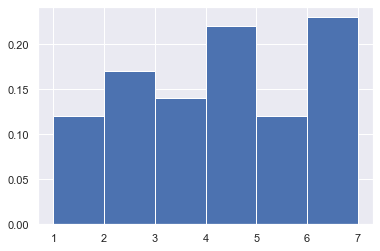

In [84]:
# your code here
plt.hist(dice['value'], bins = range(1,8), density = True)

"""
your comments here
"""

Relatively even distribution - slightly skewed right with many 4s and 6s, puling the mean to the right.

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([0.175, 0.167, 0.175, 0.168, 0.149, 0.166]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

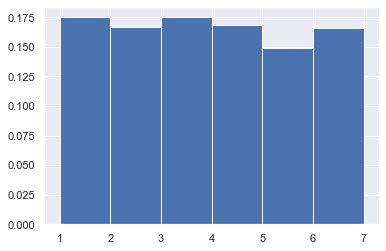

In [85]:
# your code here

dice3 = pd.read_csv('../data/roll_the_dice_thousand.csv')
plt.hist(dice3['value'], bins = range(1,8), density = True)

"""
your comments here
"""

With even more rolls, the distribution is closer to being even - each number appears around 16% of the time which is close to 1/6.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <a list of 10 Patch objects>)

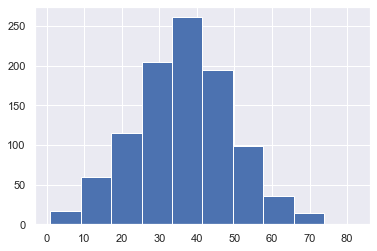

In [98]:
# your code here
age = pd.read_csv('../data/ages_population.csv')
age.head()

freq = pd.DataFrame((age['observation'].value_counts()) / len(dice))
freq.head()

plt.hist(age['observation'])

# Mean estimate - ~35
# Standard deviation estimate - 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [100]:
# your code here
print(age.mean())
print(age.std())

age.describe()

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


"""
your comments here
"""
Yes - very close to the estimate.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


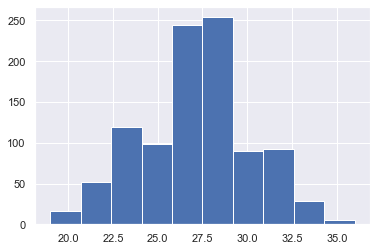

In [104]:
# your code here
age2 = pd.read_csv('../data/ages_population2.csv')
plt.hist(age2['observation'])
age2.describe()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

"""
your comments here
"""

Looks like this takes a smaller range of the the ages - just from 20 to 35 or so. We can see the mean is closer to 27 and standard deviation is most likely around 2.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [105]:
# your code here
print(age2.mean())
print(age2.std())

age2.describe()

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


"""
your comments here
"""

The standard deviation is a lot smaller given the smaller range of the dataset. The mean is also lower given the nature of the data.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

(array([0.00105263, 0.00434211, 0.01026316, 0.02078947, 0.02460526,
        0.02289474, 0.0175    , 0.0075    , 0.01539474, 0.00723684]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <a list of 10 Patch objects>)

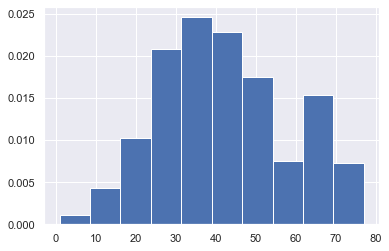

In [107]:
# your code here
age3 = pd.read_csv('../data/ages_population3.csv')
plt.hist(age3['observation'], density = True)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [108]:
# your code here
age3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


"""
your comments here
"""
The mean is higher than the peak since there are more values in the older age range. It could be considered bimodal with a second peak in the 70s range as well.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [109]:
# your code here
print(age3.quantile(0.25))
print(age3.quantile(0.5))
print(age3.quantile(0.75))
print(age3.quantile(1))

observation    30.0
Name: 0.25, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    53.0
Name: 0.75, dtype: float64
observation    77.0
Name: 1, dtype: float64


"""
your comments here
"""

The median is slightly than the mean - this is because the mean is being pulled up by the greater number of older age data entries in the 70s range.

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [110]:
# your code here
print(age3.quantile(0.9))
print(age3.quantile(0.1))

observation    67.0
Name: 0.9, dtype: float64
observation    22.0
Name: 0.1, dtype: float64


"""
your comments here
"""

The oldest 10% of the sample are within a smaller 10 year gap of 67 to 77 whereas the youngest 10% range from 1 to 22 - another way to show the data skews older.

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

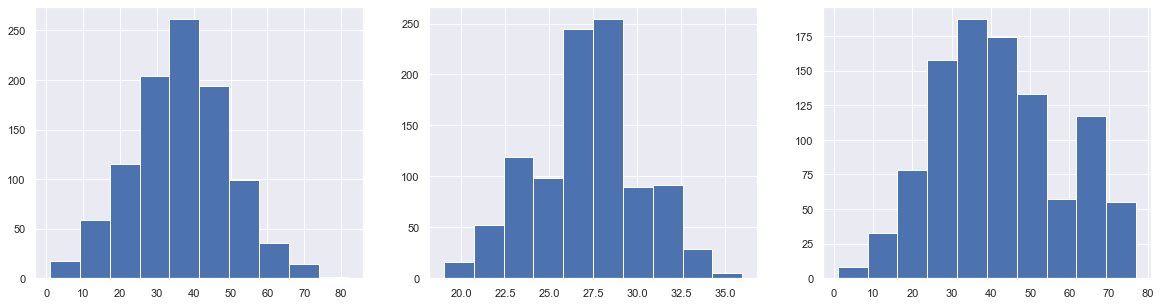

       observation
count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
       observation
count  1000.000000
mean     27.155000
std       2.969814
min      19.000000
25%      25.000000
50%      27.000000
75%      29.000000
max      36.000000
       observation
count  1000.000000
mean     41.989000
std      16.144706
min       1.000000
25%      30.000000
50%      40.000000
75%      53.000000
max      77.000000


In [119]:
# your code here
fig, axs = plt.subplots(1,3, figsize = (20,5))

axs[0].hist(age['observation'])
axs[1].hist(age2['observation'])
axs[2].hist(age3['observation'])

plt.show()

print(age.describe())
print(age2.describe())
print(age3.describe())

"""
your comments here
"""

Plots 1 and 3 are more representative of a general population whereas plot 2 is skewed to a neighborhood where there are more young people - perhaps a university or near a city center. Plot 1 neighborhood may have a larger concentration of elderly homes.